In [1]:
%load_ext autoreload

%autoreload 2

In [1]:
from tqdm.notebook import tqdm
import time
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import make_scorer, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix, f1_score, recall_score, accuracy_score

from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve

In [3]:
with open('./results.pickle', 'rb') as file_:

    results_dict = pickle.load(file_)

results = pd.DataFrame(results_dict)

In [4]:
results_dict[0].keys()

dict_keys(['BLR_preds', 'BLR_posterior', 'LR_preds', 'y_test'])

In [30]:
results['y_test'][0]

0      False
1      False
2      False
3      False
4      False
       ...  
799    False
800    False
801    False
802    False
803    False
Name: 1yeardeath_x, Length: 804, dtype: bool

<ipython-input-5-cba577fdef10>:38: RuntimeWarning: invalid value encountered in long_scalars
  stats['PPV'].append(tp/(tp+fp))


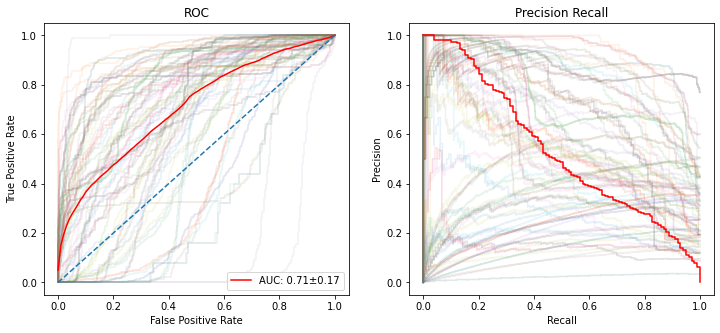

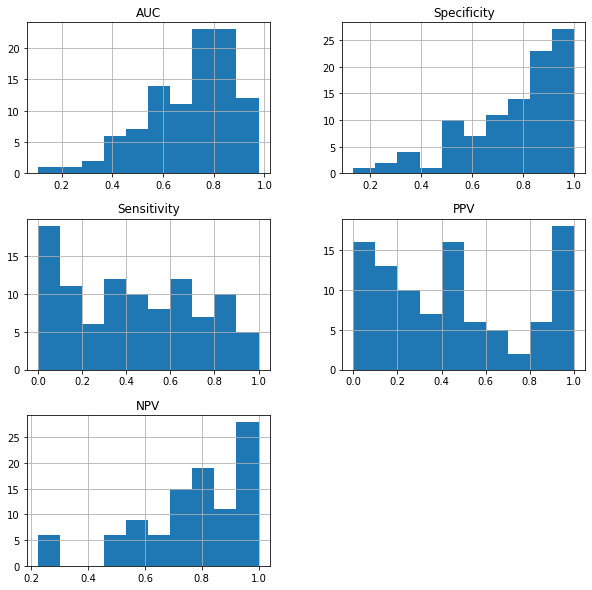

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

stats = {'AUC':[]
        ,'Specificity':[]
        ,'Sensitivity':[]
        ,'PPV':[]
        ,'NPV':[]}

roc_curves = []
prec_rec_curves = []

for idx, row in results.iterrows():

    preds = [1 if el > 0.5 else 0 for el in row['BLR_preds']]

    fpr, tpr, thresh = roc_curve(row['y_test'], row['BLR_preds']);
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax1, alpha=0.1)

    roc_curves.append(np.interp(np.linspace(0,1,100), fpr, tpr))

    #ax2.plot(fpr_u, tpr_u, label='unweighted')
    ax1.set_title("ROC")

    prec, recall, _ = precision_recall_curve(row['y_test'], row['BLR_preds'])
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=ax2, alpha=0.1)
    ax2.set_title("Precision Recall")
    prec_rec_curves.append(np.interp(np.linspace(0,1,100), prec, recall))


    cm = confusion_matrix(row['y_test'], preds)

    tn, fp, fn, tp = cm.flatten()

    try:
        stats['AUC'].append(roc_auc_score(row['y_test'], row['BLR_preds']))
        stats['Specificity'].append(tn/(tn+fp))
        stats['Sensitivity'].append(tp/(tp+fn))
        stats['PPV'].append(tp/(tp+fp))
        stats['NPV'].append(tn/(tn+fn))

    except: pass

roc_curves=np.array(roc_curves)
prec_rec_curves=np.array(prec_rec_curves)

#fpr_w, tpr_w, thresh_w = roc_curve(np.concatenate(results['y_test'].values), np.concatenate(results['LR_preds'].values));
#auc = roc_auc_score(np.concatenate(results['y_test'].values), np.concatenate(results['LR_preds'].values))
RocCurveDisplay(fpr=np.linspace(0,1,100), tpr=np.nanmean(roc_curves, axis=0)).plot(ax=ax1, color='r', label=f"AUC: {np.mean(stats['AUC']):.2f}±{np.std(stats['AUC']):.2f}")
PrecisionRecallDisplay(recall=np.linspace(0,1,100), precision=np.nanmean(prec_rec_curves, axis=0)).plot(ax=ax2, color='r')


ax1.plot([0,1],[0,1], ls='--')
pd.DataFrame(stats).hist(figsize=(10,10));


<ipython-input-6-deaafc0035e4>:38: RuntimeWarning: invalid value encountered in long_scalars
  stats['PPV'].append(tp/(tp+fp))
<ipython-input-6-deaafc0035e4>:38: RuntimeWarning: invalid value encountered in long_scalars
  stats['PPV'].append(tp/(tp+fp))
<ipython-input-6-deaafc0035e4>:38: RuntimeWarning: invalid value encountered in long_scalars
  stats['PPV'].append(tp/(tp+fp))
<ipython-input-6-deaafc0035e4>:38: RuntimeWarning: invalid value encountered in long_scalars
  stats['PPV'].append(tp/(tp+fp))
<ipython-input-6-deaafc0035e4>:38: RuntimeWarning: invalid value encountered in long_scalars
  stats['PPV'].append(tp/(tp+fp))


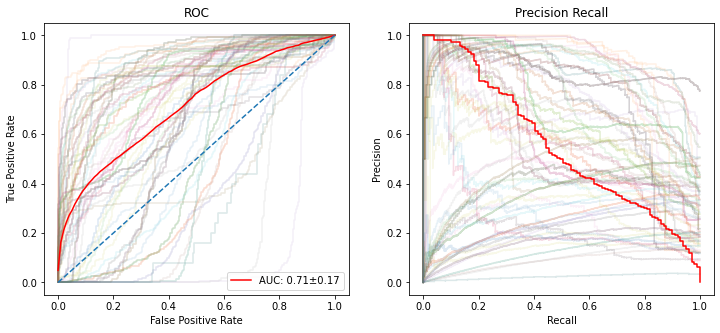

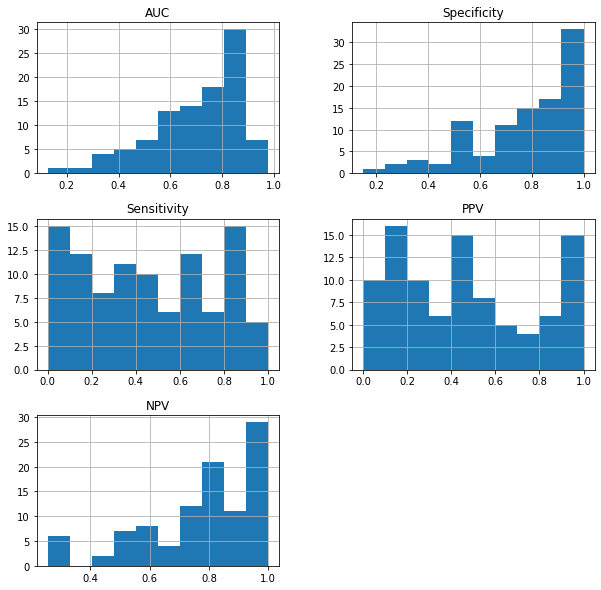

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

stats = {'AUC':[]
        ,'Specificity':[]
        ,'Sensitivity':[]
        ,'PPV':[]
        ,'NPV':[]}

roc_curves = []
prec_rec_curves = []

for idx, row in results.iterrows():

    preds = [1 if el > 0.5 else 0 for el in row['LR_preds']]

    fpr, tpr, thresh = roc_curve(row['y_test'], row['LR_preds']);
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax1, alpha=0.1)

    roc_curves.append(np.interp(np.linspace(0,1,100), fpr, tpr))

    #ax2.plot(fpr_u, tpr_u, label='unweighted')
    ax1.set_title("ROC")

    prec, recall, _ = precision_recall_curve(row['y_test'], row['LR_preds'])
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=ax2, alpha=0.1)
    ax2.set_title("Precision Recall")
    prec_rec_curves.append(np.interp(np.linspace(0,1,100), prec, recall))


    cm = confusion_matrix(row['y_test'], preds)

    tn, fp, fn, tp = cm.flatten()

    try:
        stats['AUC'].append(roc_auc_score(row['y_test'], row['LR_preds']))
        stats['Specificity'].append(tn/(tn+fp))
        stats['Sensitivity'].append(tp/(tp+fn))
        stats['PPV'].append(tp/(tp+fp))
        stats['NPV'].append(tn/(tn+fn))

    except: pass

roc_curves=np.array(roc_curves)
prec_rec_curves=np.array(prec_rec_curves)

#fpr_w, tpr_w, thresh_w = roc_curve(np.concatenate(results['y_test'].values), np.concatenate(results['LR_preds'].values));
#auc = roc_auc_score(np.concatenate(results['y_test'].values), np.concatenate(results['LR_preds'].values))
RocCurveDisplay(fpr=np.linspace(0,1,100), tpr=np.nanmean(roc_curves, axis=0)).plot(ax=ax1, color='r', label=f"AUC: {np.mean(stats['AUC']):.2f}±{np.std(stats['AUC']):.2f}")
PrecisionRecallDisplay(recall=np.linspace(0,1,100), precision=np.nanmean(prec_rec_curves, axis=0)).plot(ax=ax2, color='r')


ax1.plot([0,1],[0,1], ls='--')
pd.DataFrame(stats).hist(figsize=(10,10));


In [7]:
np.arange(5,100,5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])

In [12]:
thres_results = []

for th in np.arange(20,100,5):

    for i, (idx, row) in enumerate(tqdm(list(results.iterrows())), start=1):

        try:
            perc = np.percentile(row['BLR_posterior'].std(axis=0), th)
            indx = np.where(row['BLR_posterior'].std(axis=0) < perc)[0]

            preds = row['BLR_posterior'][:, indx].mean(axis=0)
            y_true = row['y_test'].values[indx]

            roc_auc_score(y_true, preds)

            thres_results.append({'Threshold': th,
                                'AUC': roc_auc_score(y_true, preds),
                                'Bootstrap':i})
        except:
            continue

In [27]:
thresh_results=pd.DataFrame(thres_results)
thresh_results.groupby('Threshold')['AUC'].mean()
#thresh_results.groupby('Threshold')['AUC'].std()

Threshold
20    0.626957
25    0.639873
30    0.646869
35    0.675687
40    0.705386
45    0.722575
50    0.731458
55    0.734247
60    0.735530
65    0.733910
70    0.732500
75    0.729065
80    0.726189
85    0.722127
90    0.717941
95    0.713342
Name: AUC, dtype: float64

<ipython-input-21-7df9b995074f>:61: RuntimeWarning: invalid value encountered in true_divide
  stats['MCC'].append(((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
<ipython-input-21-7df9b995074f>:65: RuntimeWarning: invalid value encountered in long_scalars
  stats['NPV'].append(tn/(tn+fn))
<ipython-input-21-7df9b995074f>:61: RuntimeWarning: invalid value encountered in true_divide
  stats['MCC'].append(((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
<ipython-input-21-7df9b995074f>:65: RuntimeWarning: invalid value encountered in long_scalars
  stats['NPV'].append(tn/(tn+fn))
<ipython-input-21-7df9b995074f>:61: RuntimeWarning: invalid value encountered in true_divide
  stats['MCC'].append(((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
<ipython-input-21-7df9b995074f>:65: RuntimeWarning: invalid value encountered in long_scalars
  stats['NPV'].append(tn/(tn+fn))
<ipython-input-21-7df9b995074f>:61: RuntimeWarning: invalid value encountered in true_divid

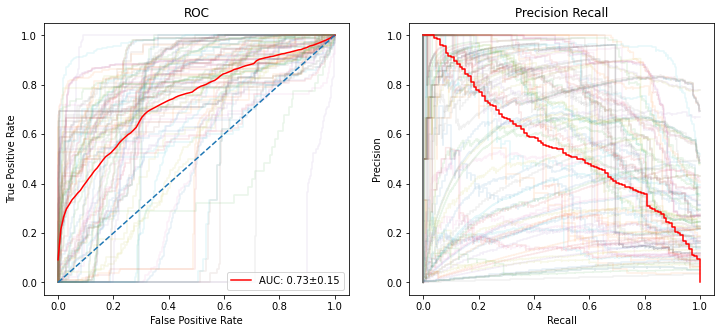

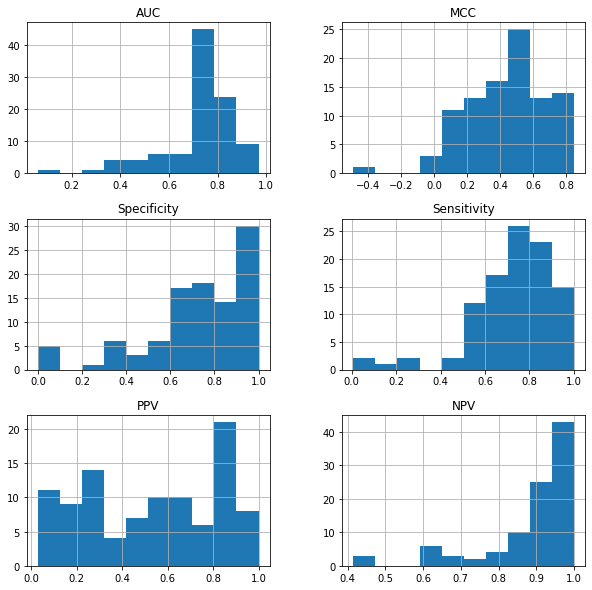

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

stats = {'AUC':[]
        ,'MCC':[]
        ,'Specificity':[]
        ,'Sensitivity':[]
        ,'PPV':[]
        ,'NPV':[]}

roc_curves = []
prec_rec_curves = []

for idx, row in results.iterrows():

    perc = np.percentile(row['BLR_posterior'].std(axis=0), 55)
    indx = np.where(row['BLR_posterior'].std(axis=0) < perc)[0]

    preds = row['BLR_posterior'][:, indx].mean(axis=0)
    y_true = row['y_test'].values[indx]

    all=[]
    thresholds=np.linspace(0,1,50)
    for thresh in thresholds:

        predst = [1 if el > thresh else 0 for el in preds]

        cm = confusion_matrix(y_true, predst)
        tn, fp, fn, tp = cm.flatten()

        sens, spec = tp/(tp+fn), tn/(tn+fp)

        #print(f"Specificity: {spec}")
        #print(f"Sensitivity: {sens}")

        all.append(sens*spec)

    op = thresholds[np.argmax(all)]

    predst = [1 if el > op else 0 for el in preds]

    fpr, tpr, thresh = roc_curve(y_true, preds);
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax1, alpha=0.1)

    roc_curves.append(np.interp(np.linspace(0,1,100), fpr, tpr))

    #ax2.plot(fpr_u, tpr_u, label='unweighted')
    ax1.set_title("ROC")

    prec, recall, _ = precision_recall_curve(y_true, preds)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=ax2, alpha=0.1)
    ax2.set_title("Precision Recall")
    prec_rec_curves.append(np.interp(np.linspace(0,1,100), prec, recall))


    cm = confusion_matrix(y_true, predst)

    tn, fp, fn, tp = cm.flatten()

    try:
        stats['AUC'].append(roc_auc_score(y_true, preds))
        stats['MCC'].append(((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
        stats['Specificity'].append(tn/(tn+fp))
        stats['Sensitivity'].append(tp/(tp+fn))
        stats['PPV'].append(tp/(tp+fp))
        stats['NPV'].append(tn/(tn+fn))

    except: pass

roc_curves=np.array(roc_curves)
prec_rec_curves=np.array(prec_rec_curves)

#fpr_w, tpr_w, thresh_w = roc_curve(np.concatenate(results['y_test'].values), np.concatenate(results['LR_preds'].values));
#auc = roc_auc_score(np.concatenate(results['y_test'].values), np.concatenate(results['LR_preds'].values))
RocCurveDisplay(fpr=np.linspace(0,1,100), tpr=np.nanmean(roc_curves, axis=0)).plot(ax=ax1, color='r', label=f"AUC: {np.mean(stats['AUC']):.2f}±{np.std(stats['AUC']):.2f}")
PrecisionRecallDisplay(recall=np.linspace(0,1,100), precision=np.nanmean(prec_rec_curves, axis=0)).plot(ax=ax2, color='r')


ax1.plot([0,1],[0,1], ls='--')
statsdf = pd.DataFrame(stats)
statsdf.hist(figsize=(10,10));


In [28]:
statsdf

AUC       MCC  Specificity  Sensitivity       PPV       NPV
0   0.776936  0.460508     0.747692     0.760684  0.520468  0.896679
1   0.784733  0.315857     0.708223     0.777778  0.241379  0.963899
2   0.870021  0.497010     0.780715     0.771429  0.534653  0.912727
3   0.736993  0.293014     0.659371     0.870968  0.178218  0.983673
4   0.811074  0.521388     0.838596     0.676301  0.717791  0.810169
..       ...       ...          ...          ...       ...       ...
95  0.877334  0.528229     0.783934     0.755981  0.669492  0.847305
96  0.624205       NaN     0.000000     1.000000  0.119537       NaN
97  0.748010  0.702396     0.973140     0.679012  0.808824  0.947686
98  0.817875  0.812779     0.982143     0.785714  0.905882  0.954447
99  0.383382  0.071555     0.344388     0.809524  0.062044  0.971223

[100 rows x 6 columns]